## Support vector machines


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Loading data

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe() 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Feature Engineering

In [7]:
Male = pd.get_dummies(df['sex'] , drop_first=True)
# df = pd.concat([df,Male],axis=1)
# del df['male']

df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
Smoker = pd.get_dummies(df['smoker'],drop_first=True)
# df = pd.concat([df, Smoker] , axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df = df.rename(columns={'yes' : 'Smoker'})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
Region = pd.get_dummies(df['region'],drop_first=True)
# df = pd.concat([df, Region] , axis=1)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Exploratory Analysis

#### distribution of "sex" parameter

In [12]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

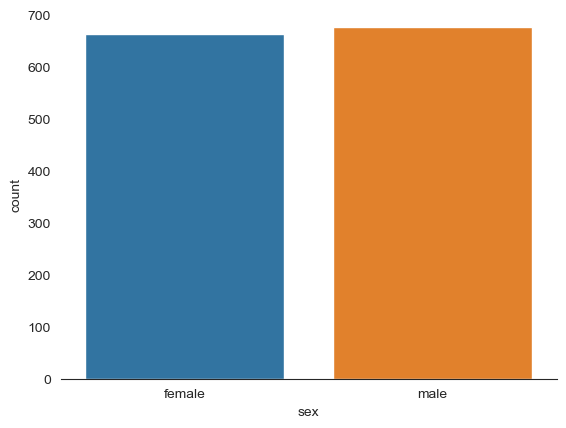

In [13]:

sns.set_style('white')
sns.countplot(x = 'sex' ,data = df)
sns.despine(left=True)


#### Relationship of smoking and gender to changes

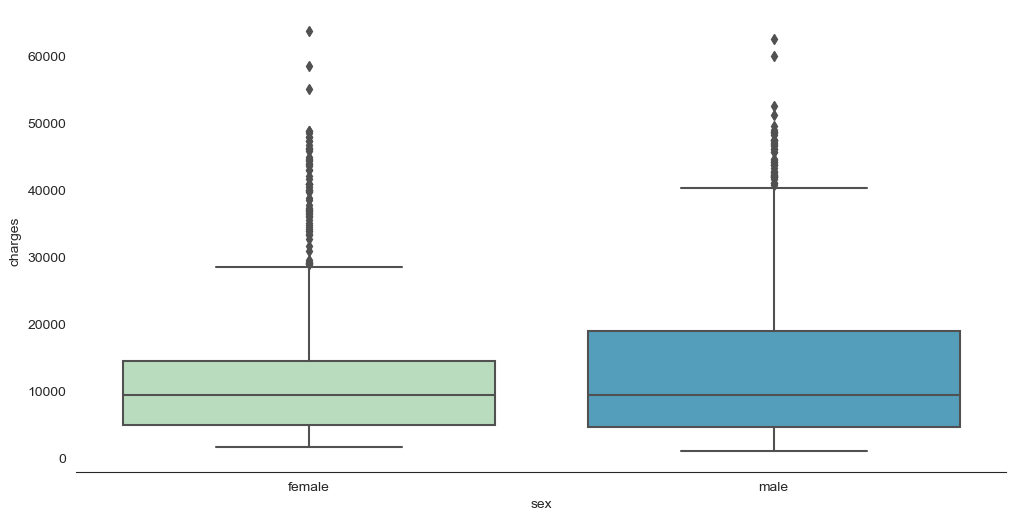

In [14]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.boxplot(x = 'sex' ,y="charges",data = df,palette="GnBu")
sns.despine(left=True)

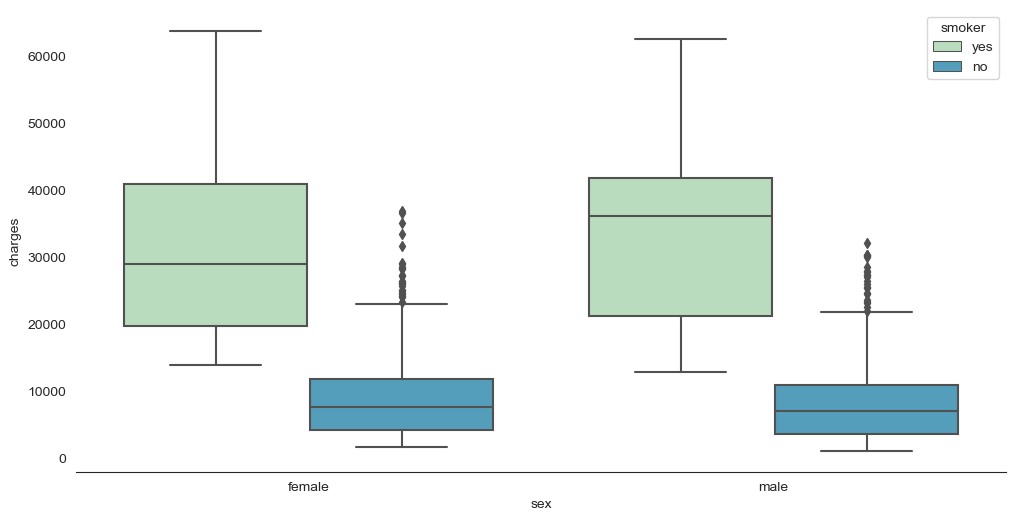

In [15]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.boxplot(x = 'sex' ,y="charges",data = df,palette="GnBu",hue="smoker")
sns.despine(left=True)

<Axes: xlabel='age', ylabel='charges'>

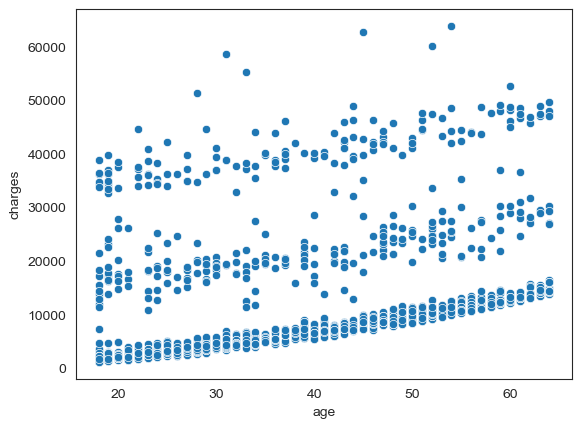

In [16]:
sns.scatterplot(x = "age",y = "charges",data =df)

<Axes: xlabel='age', ylabel='charges'>

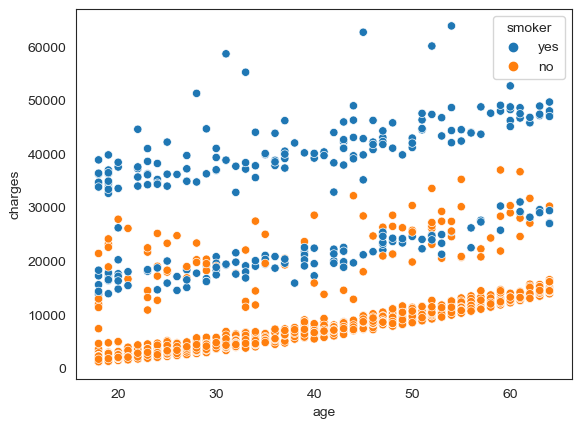

In [17]:
sns.scatterplot(x = "age",y = "charges",data =df, hue="smoker")

<Axes: xlabel='age', ylabel='charges'>

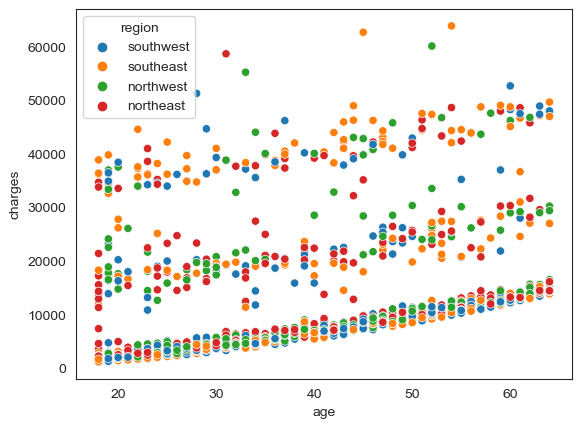

In [18]:
sns.scatterplot(x = "age",y = "charges",data =df, hue="region")

<Axes: xlabel='bmi', ylabel='charges'>

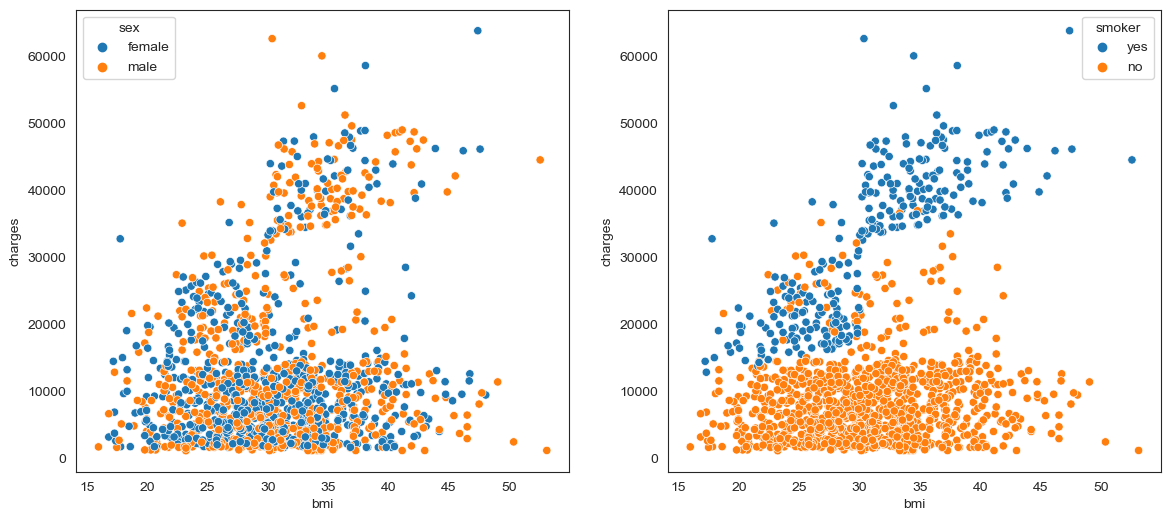

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize =(14,6))
sns.scatterplot(x = "bmi",y = "charges",data =df, hue="sex" , ax=ax[0]) 
sns.scatterplot(x = "bmi",y = "charges",data =df, hue="smoker", ax=ax[1])

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
df.drop(["sex","smoker","region"], axis=1,inplace=True)

In [22]:
df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


<Axes: >

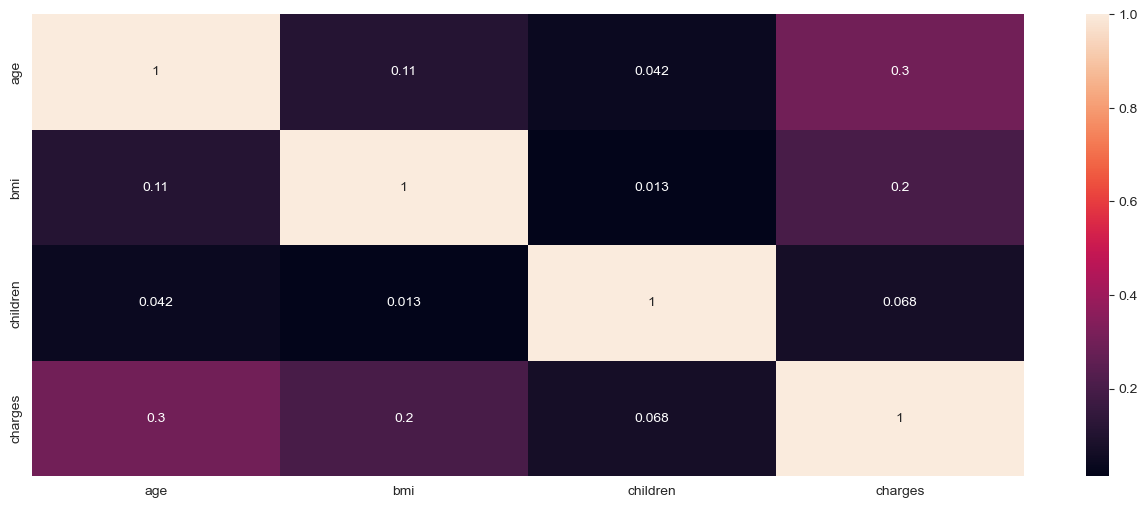

In [23]:
plt.figure(figsize=(16,6)) 
sns.heatmap(df.corr(), annot=True)

In [24]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Splitting the data

In [25]:
x = df.drop('charges' , axis = 1)
y = df['charges']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [27]:
x_train.shape

(1070, 3)

In [28]:
x_test.shape

(268, 3)

In [29]:
df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


### Scaling the data

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)


### suppot vector regression model

In [32]:
from sklearn.svm import SVR

regressor = SVR()


In [33]:
regressor.fit(scaled_x_train,y_train)

SVR()

In [34]:
predict = regressor.predict(scaled_x_test)

In [35]:
predict.shape

(268,)

In [36]:
y_test.shape

(268,)

In [37]:
predict[:10]

array([9308.08228996, 9331.2991014 , 9500.00738155, 9422.4695815 ,
       9485.83998504, 9300.71074429, 9509.85927542, 9420.68974137,
       9296.69177376, 9299.1804758 ])

In [38]:
y_test[:10]

464      1632.03625
1306    16115.30450
1284    47403.88000
6        8240.58960
260     11837.16000
791      1252.40700
531     14043.47670
88       8026.66660
205      4337.73520
291     20277.80751
Name: charges, dtype: float64

In [39]:
regressor.score

<bound method RegressorMixin.score of SVR()>